# Task 1:- To Explore Supervised Machine Learning 

#### PROBLEM STATEMENT :-
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
Data can be found at http://bit.ly/w-data



To get started with data analysis and preprocessing we need to to import some python libraries.

In [28]:
# Importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

### Loading the dataset

In [29]:
# Reading data from remote link
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
#Shape of data
data.shape

(25, 2)

In [31]:
# Info
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
data.describe()  

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data visualisation

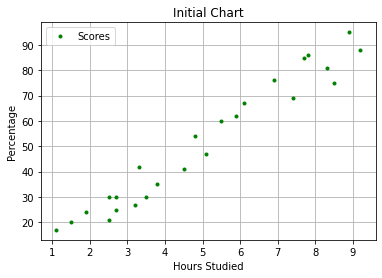

In [33]:
# Plotting the distribution of scores using 2-D graph
data.plot(x='Hours',y='Scores',style='g.')
plt.title('Initial Chart')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.grid()
plt.show()

[]

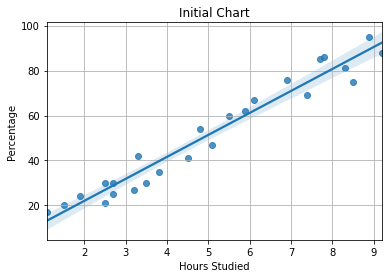

In [34]:
# Plotting the regression line to see the fitting
sns.regplot(x='Hours',y='Scores',data=data)
plt.title("Initial Chart")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.grid()
plt.plot()

In [ ]:
''''From the graph above, we can see that there is a positive linear relation between the 
number of hours studied and percentage of score.'''

### Data preprocessing

### 1). Missing value analysis

In [35]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(data.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_per = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_per['Missing_percentage'] = (missing_per['Missing_percentage']/len(data))*100
#descending order
missing_per = missing_per.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_per

,Variables,Missing_percentage
0,Hours,0.0
1,Scores,0.0


In [ ]:
# No missing values are present.

### 2). Outlier analysis

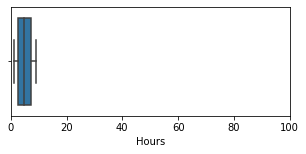

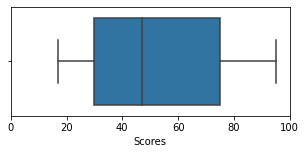

In [36]:
# Creating list of column names 
x=list(data.columns)
# Loop for Creating box plot for every variable
for i in x:
    plt.figure(figsize=(5,2)) 
    plt.xlim(0,100)
    sns.boxplot(x=data[i],data=data,orient='h')
    plt.show()

In [37]:
# From the above, we can see that there are no outliers present in the data.

### 3). Correlation analysis

We can perform correlation analysis to understand the dependency of dependent variable(i.e. Scores) on independent variable(i.e. Hours) because for good ML model, it is  mandatory that independent variable must have high correlation with dependent variable.

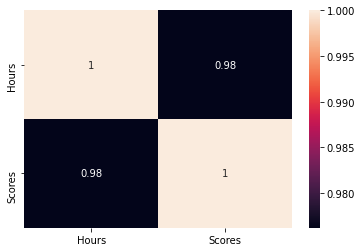

In [38]:
# Correlation heatmap
sns.heatmap(data.corr(),annot = True)

In [39]:
# From the above heatmap, we can see that there is high correlation(0.98) between scores and hours.

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [40]:
#Divide the data into attributes X and label Y
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [41]:
#Now Divide the data into train test split using sckit-learn built in train_test_split() method
#For this task i have splitted data into 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0) 

In [42]:
## check the size
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


### Training the Algorithm

In [43]:
import time

from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
s = time.time()
model.fit(x_train, y_train) 

print("Training completed in the time:-")
print((time.time() - s)*1000 , "ms")

Training completed in the time:-
3.529787063598633 ms


In [44]:
# Obtaining the coefficient and intercept of the linear regression model
inter = model.intercept_
coeff = model.coef_
print("The intercept is : ",inter)
print(" THe cofficient is :",coeff[0])

The intercept is :  2.018160041434662
 THe cofficient is : 9.91065648064224


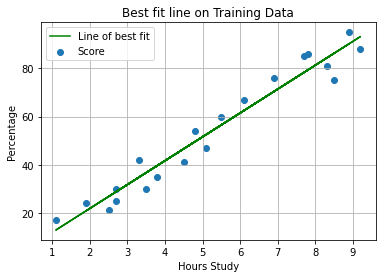

In [45]:
# Visualize for training data
plt.scatter(x_train,y_train, label="Score")
plt.plot(x_train, model.predict(x_train),color='green', label='Line of best fit')
plt.xlabel("Hours Study")
plt.ylabel("Percentage")
plt.title("Best fit line on Training Data")
plt.legend()
plt.grid()
plt.show()

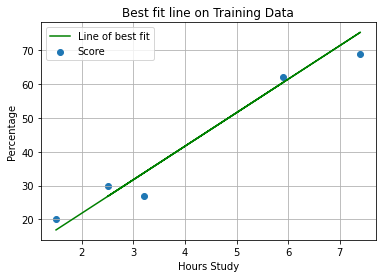

In [46]:
# Visualize for testing data
plt.scatter(x_test,y_test, label="Score")
plt.plot(x_test, model.predict(x_test),color='green', label='Line of best fit')
plt.xlabel("Hours Study")
plt.ylabel("Percentage")
plt.title("Best fit line on Training Data")
plt.legend()
plt.grid()
plt.show()

### Making Predictions

In [47]:
#displaying the test data(in Hours) and making some predictions on the test data
print(x_test)
y_pred= model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Text(0, 0.5, 'Percentage Score')

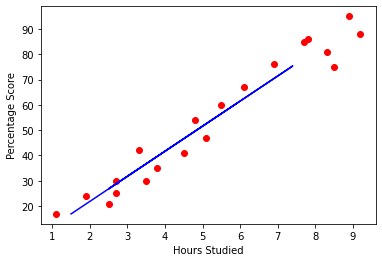

In [48]:
plt.scatter(x_train,y_train, color= "red")
plt.plot(x_test,y_pred, color= "blue")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")

In [49]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Query:- What will be predicted score if a student study for 9.25 hrs in a day?

In [50]:
# Solution
print("No of Hours = ",9.25)
print("Predicted Score = ", model.predict([[9.25]])[0])

No of Hours =  9.25
Predicted Score =  93.69173248737539


### Evaluation of the Model

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
